In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [4]:
model = Sequential()

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 23s 48ms/step - loss: 6.0857 - accuracy: 0.8035 - val_loss: 0.5639 - val_accuracy: 0.8478
Epoch 2/10
469/469 [==============================] - 23s 50ms/step - loss: 0.3780 - accuracy: 0.8820 - val_loss: 0.4393 - val_accuracy: 0.8714
Epoch 3/10
469/469 [==============================] - 23s 50ms/step - loss: 0.2907 - accuracy: 0.9039 - val_loss: 0.3958 - val_accuracy: 0.8818
Epoch 4/10
469/469 [==============================] - 23s 49ms/step - loss: 0.2362 - accuracy: 0.9177 - val_loss: 0.4309 - val_accuracy: 0.8803
Epoch 5/10
469/469 [==============================] - 23s 48ms/step - loss: 0.2073 - accuracy: 0.9265 - val_loss: 0.4085 - val_accuracy: 0.8784
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.1814 - accuracy: 0.9348 - val_loss: 0.4161 - val_accuracy: 0.8813
Epoch 7/10
469/469 [==============================] - 28s 60ms/step - loss: 0.1584 - accuracy: 0.9426 - val_loss: 0.3860 - val_accuracy:

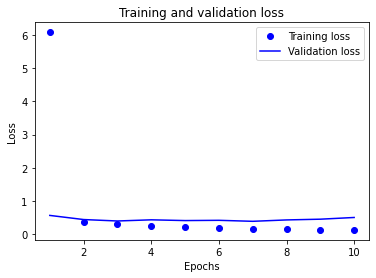

In [5]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()